In [9]:
import pandas as pd
import matplotlib.pyplot as plt

r = pd.read_csv( 'data/ratings.csv' )
tr = pd.read_csv( 'data/to_read.csv' )
b = pd.read_csv( 'data/books.csv' )

t = pd.read_csv( 'data/tags.csv' )
bt = pd.read_csv( 'data/book_tags.csv')

In [10]:
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [11]:
max(r.user_id)

53424

In [12]:
max(r.book_id)

10000

In [13]:
len(r.rating)

5976479

In [14]:
tr.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [15]:
len(tr.book_id.unique())

9986

In [8]:
# Take 50 Hours

import pandas as pd
import networkx as nx
from itertools import combinations
from tqdm import tqdm

# Group the data by book_id
grouped = r.groupby('book_id')['user_id']

# Create an empty graph
graph = nx.Graph()

# Iterate over each group
for book_id, users in tqdm(grouped):
    # Generate all pairs of users for this book
    user_pairs = combinations(users, 2)
    
    # Add edges between all pairs of users
    for user_pair in user_pairs:
        graph.add_edge(*user_pair)

# Print the number of nodes and edges in the graph
print(len(graph.nodes()))
print(len(graph.edges()))

# visualize the graph
# Draw the graph
nx.draw(graph, with_labels=False, node_size=10)
plt.show()

  0%|          | 0/10000 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [8]:
# Quickest 
import pandas as pd
import networkx as nx
from itertools import combinations
from collections import defaultdict
from tqdm import tqdm

# Sample because it's taking too long
r = r.sample(frac=0.1)
# Create a dictionary where the keys are book_ids and the values are sets of user_ids
book_users = defaultdict(set)

# Populate the dictionary
for _, row in tqdm(r.iterrows(), total=r.shape[0]):
    book_users[row['book_id']].add(row['user_id'])

# Create an empty graph
graph = nx.Graph()

# Iterate over each book
for book_id, users in tqdm(book_users.items(), total=len(book_users)):
    # Generate all pairs of users for this book
    user_pairs = combinations(users, 2)
    
    # Add edges between all pairs of users
    for user_pair in user_pairs:
        graph.add_edge(*user_pair)

# Print the number of nodes and edges in the graph
print(len(graph.nodes()))
print(len(graph.edges()))


100%|██████████| 9999/9999 [02:18<00:00, 72.43it/s]  


53403
92346973


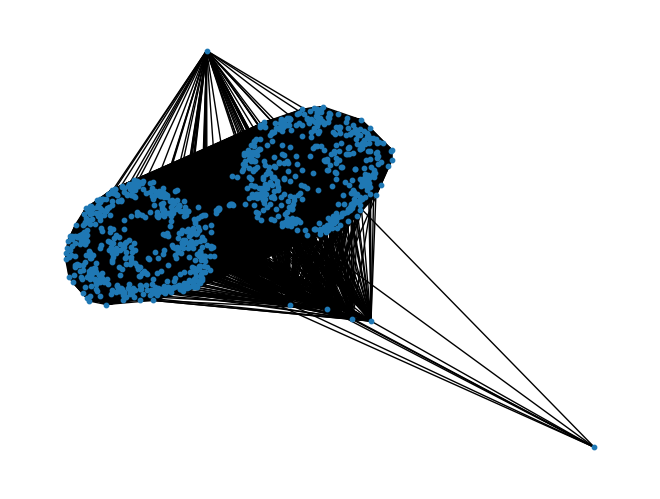

In [9]:
# Draw the graph only for a sample of nodes (all the nodes is too big)
sampled_nodes = list(graph.nodes())[:1000]
sampled_graph = graph.subgraph(sampled_nodes)

# Draw the graph
nx.draw(sampled_graph, with_labels=False, node_size=10)

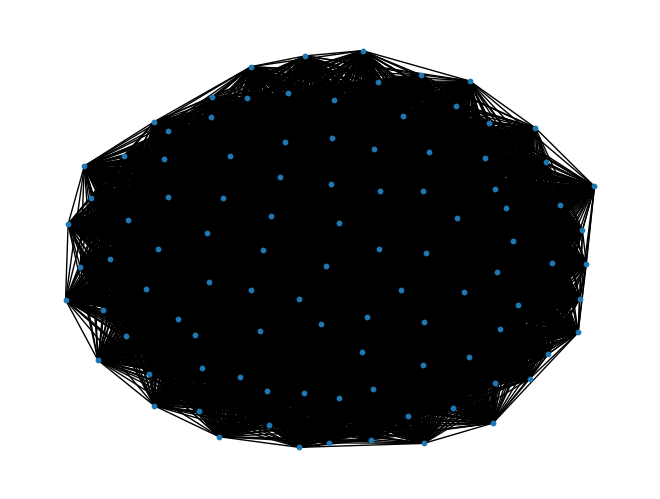

In [11]:
# Draw the graph only for a sample of nodes (all the nodes is too big)
sampled_nodes = list(graph.nodes())[:100]
sampled_graph = graph.subgraph(sampled_nodes)

# Draw the graph
nx.draw(sampled_graph, with_labels=False, node_size=10)

AttributeError: 'Axes' object has no attribute 'flatten'

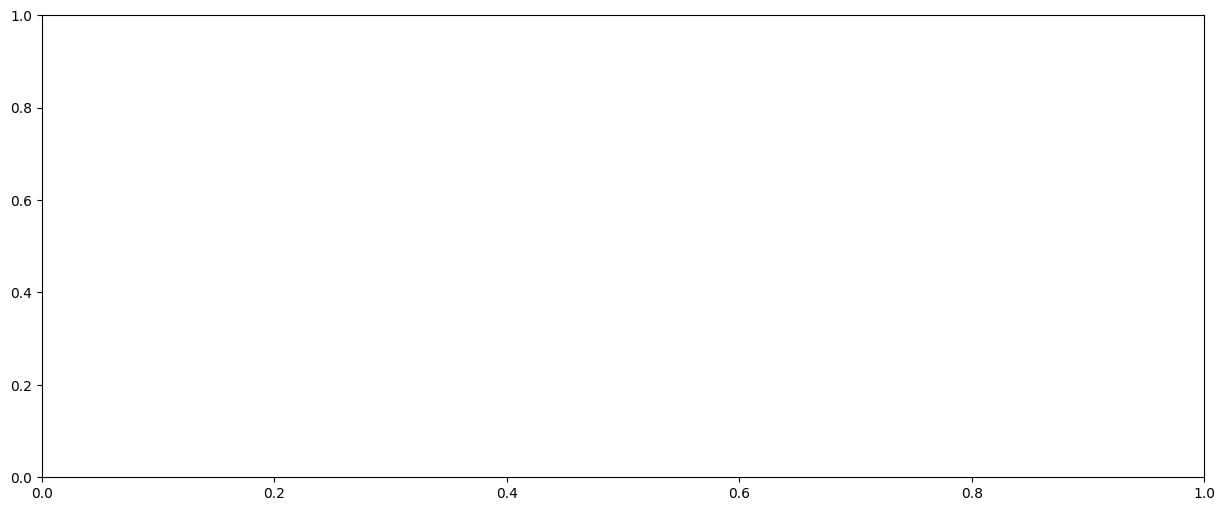

In [39]:
import matplotlib.pyplot as plt

# Set up the figure and the grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

# Flatten the axes array
#axes = axes.flatten()

# Draw 10 graphs with 10 nodes randomly selected
for i in range(1):
    sampled_nodes = list(graph.nodes())[:10]

# Show the plot        
sampled_graph = graph.subgraph(sampled_nodes)
nx.draw(sampled_graph, ax=axes[i], with_labels=False, node_size=10)

plt.tight_layout()
plt.show()


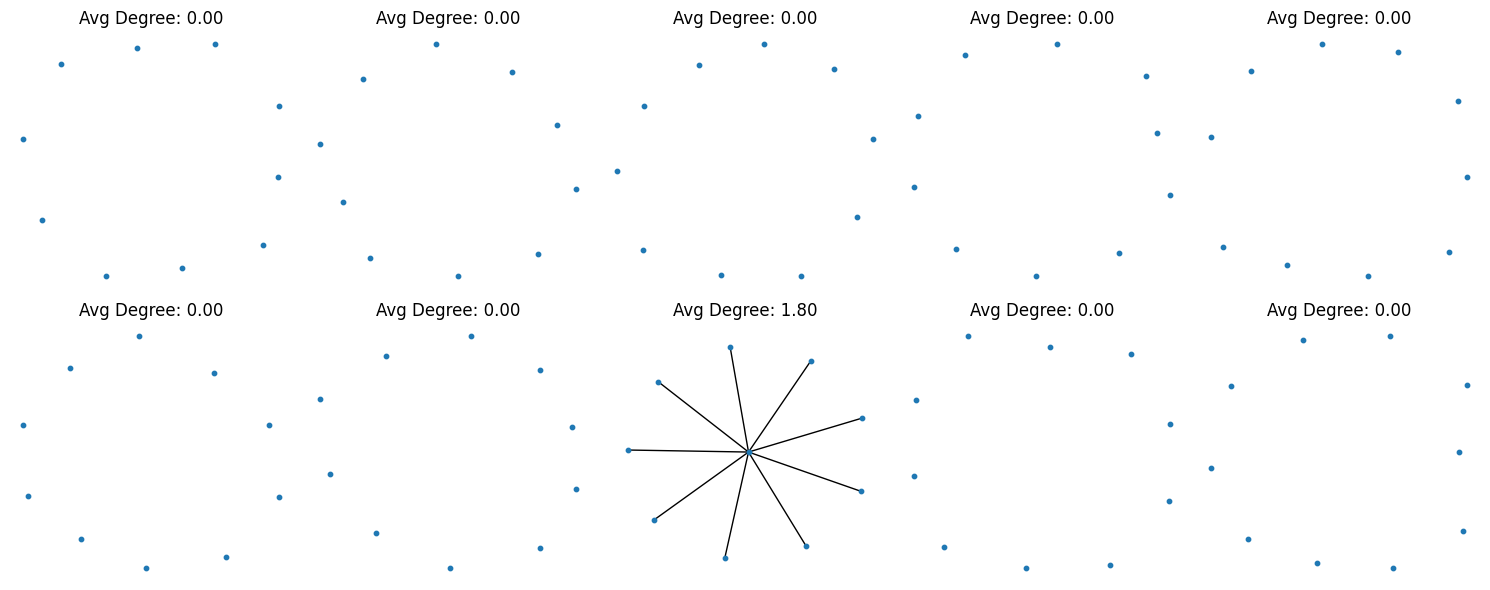

In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# Set up the figure and the grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Flatten the axes array
axes = axes.flatten()

# Draw 10 graphs with 10 nodes randomly selected
for i in range(10):
    sampled_nodes = random.sample(list(graph.nodes()), 10)
    sampled_graph = graph.subgraph(sampled_nodes)
    nx.draw(sampled_graph, ax=axes[i], with_labels=False, node_size=10)
    
    # Calculate the degree of each node in the graph
    degrees = [deg for node, deg in nx.degree(sampled_graph)]
    
    # Calculate the average degree of the graph
    avg_degree = sum(degrees) / len(degrees)
    
    # Display the average degree under the graph
    axes[i].set_title(f'Avg Degree: {avg_degree:.2f}')

# Show the plot
plt.tight_layout()
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 3741.12it/s]


38
351


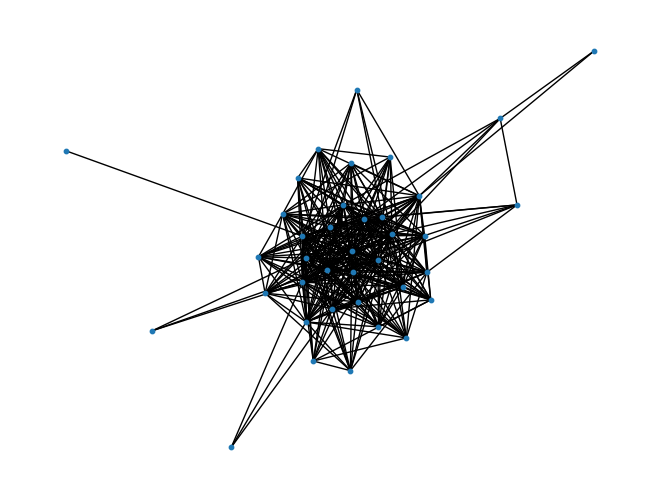

In [ ]:
#Sampled in order to visualize something

import networkx as nx
from tqdm import tqdm

# Take only the first 1000 rows because it's taking too long otherwise
r = r.head(10000)

# Create an empty graph
graph = nx.Graph()

# Get the total number of rows in the dataframe for the progress bar
total_rows = len(r)

# Iterate over the ratings dataframe
for _, row in tqdm(r.iterrows(), total=total_rows):
    user_id = row['user_id']
    book_id = row['book_id']
    
    # Find other users who rated the same book
    other_users = r[(r['book_id'] == book_id) & (r['user_id'] != user_id)]['user_id'].tolist()
    
    # Add edges between the current user and other users
    for other_user in other_users:
        graph.add_edge(user_id, other_user)

# Print the number of nodes and edges in the graph
print(len(graph.nodes()))
print(len(graph.edges()))

# visualize the graph
# Draw the graph
plt.figure(figsize=(20, 20))
nx.draw(graph, with_labels=False, node_size=10)
plt.show()

